**Руслан Мухамедьяров**

**Вариант 30**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

##Задание 1

In [ ]:
#дана матрица A
A = Matrix([[-2, -1, 11],
             [3, 4, -9],
             [4, 5, -13],
             [-1, 0, 7]]
             )

In [ ]:
#приводим A в RREF
A_rref = A.rref()

In [ ]:
A_rref

(Matrix([
 [1, 0, -7],
 [0, 1,  3],
 [0, 0,  0],
 [0, 0,  0]]), (0, 1))

На основе ненулевой подматрицы и столбцов с пивотами производим скелетное разложение A = F * G, где у F полный столбцовый ранг, у G полный строчный

In [ ]:
F = A[:,:2]

In [ ]:
F

Matrix([
[-2, -1],
[ 3,  4],
[ 4,  5],
[-1,  0]])

In [ ]:
G = A_rref[0][:2,:]

In [ ]:
G

Matrix([
[1, 0, -7],
[0, 1,  3]])

In [ ]:
#Проверяем
A == F*G

True

Находим псевдообратную F и псевдообратную G, из них находим псевдообратную A

In [ ]:
F_pseudoinverse = Inverse(F.T*F)*F.T

In [ ]:
G_pseudoinverse = G.T*Inverse(G*G.T)

In [ ]:
A_pseudoinverse = G_pseudoinverse*F_pseudoinverse

In [ ]:
A_pseudoinverse

Matrix([
[149/3068, 139/3068, 137/3068, 147/3068],
[425/3068, 345/3068, 329/3068, 409/3068],
[  58/767,  31/1534,    7/767,  99/1534]])

In [ ]:
#функция для округления
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(Number)})

Псевдообратная A

In [ ]:
round_expr(A_pseudoinverse,4)

Matrix([
[0.0486, 0.0453, 0.0447, 0.0479],
[0.1385, 0.1125, 0.1072, 0.1333],
[0.0756, 0.0202, 0.0091, 0.0645]])

##Задание 2

Дано Ax=y

Тогда решением наименьшей длины является x = A_псевдообратная * y

Находим псевдообратную A по вышеиспользованному алгоритму

In [ ]:
A = Matrix([[-4, -6, 11, 13],
             [1, -1, 8, -10],
             [-3, -5, 9, 7],
             [2, 0, 8, -14]]
             )

In [ ]:
A_rref = A.rref()

In [ ]:
A_rref

(Matrix([
 [1, 0, 0, -11],
 [0, 1, 0,   7],
 [0, 0, 1,   1],
 [0, 0, 0,   0]]), (0, 1, 2))

In [ ]:
F = A[:,:3]

In [ ]:
F

Matrix([
[-4, -6, 11],
[ 1, -1,  8],
[-3, -5,  9],
[ 2,  0,  8]])

In [ ]:
G = A_rref[0][:3,:]

In [ ]:
G

Matrix([
[1, 0, 0, -11],
[0, 1, 0,   7],
[0, 0, 1,   1]])

In [ ]:
A == F*G

True

In [ ]:
F_pseudoinverse = Inverse(F.T*F)*F.T

In [ ]:
G_pseudoinverse = G.T*Inverse(G*G.T)

In [ ]:
A_pseudoinverse = G_pseudoinverse*F_pseudoinverse

In [ ]:
A_pseudoinverse

Matrix([
[ 9881/24080, -2351/24080, -13543/24080, 599/3440],
[15259/24080, -3789/24080, -20997/24080, 901/3440],
[  1495/4816,   -209/4816,   -1713/4816,   97/688],
[ 5597/24080, -1707/24080,  -6571/24080, 203/3440]])

In [ ]:
round_expr(A_pseudoinverse,4)

Matrix([
[0.4103, -0.0976, -0.5624, 0.1741],
[0.6337, -0.1574,  -0.872, 0.2619],
[0.3104, -0.0434, -0.3557,  0.141],
[0.2324, -0.0709, -0.2729,  0.059]])

In [ ]:
y = Matrix([7, 9, 5, 5])

In [ ]:
y

Matrix([
[7],
[9],
[5],
[5]])

In [ ]:
x = A_pseudoinverse*y

Полученное решение

In [ ]:
round_expr(x,4)

Matrix([
[ 0.0522],
[-0.0306],
[ 0.7089],
[-0.0803]])

#Задание 3

In [ ]:
x = symbols('x',real=True)

Даны 4 точки

Интерполируем многочленом 3й степени

Многочлен получим из линейной комбинации многочленов, построенных на основе абсцисс 

In [ ]:
p1 = (x-1)*(x-2)*(x-3)/((0-1)*(0-2)*(0-3))

In [ ]:
p2 = (x-0)*(x-2)*(x-3)/((1-0)*(1-2)*(1-3))

In [ ]:
p3 = (x-0)*(x-1)*(x-3)/((2-0)*(2-1)*(2-3))

In [ ]:
p4 = (x-0)*(x-1)*(x-2)/((3-0)*(3-1)*(3-2))

Готовые многочлены

In [ ]:
print(p1,p2,p3,p4,sep='\n')

-(x - 3)*(x - 2)*(x - 1)/6
x*(x - 3)*(x - 2)/2
-x*(x - 3)*(x - 1)/2
x*(x - 2)*(x - 1)/6


Веса берем из ординат

In [ ]:
polynomial = simplify(10*p1-16*p2-9*p3-16*p4)

Интерполяционный многочлен

In [ ]:
round_expr(polynomial,4)

-7.8333*x**3 + 40*x**2 - 58.1667*x + 10

In [ ]:
#xdata для входа функции, ydata для выхода функции
xdata = np.arange(-5, 5, 0.1)
ydata = []

In [ ]:
#заполняем ydata
for i in xdata:
  ydata.append(polynomial.subs({x:i}))

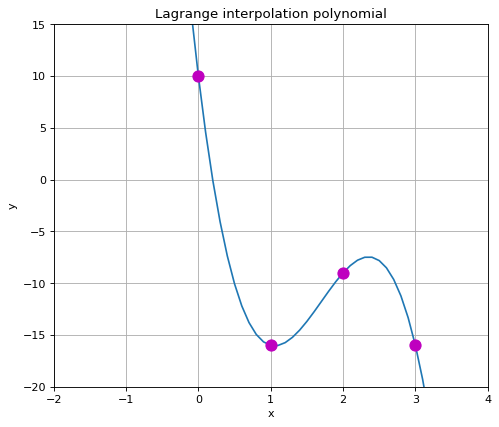

In [ ]:
#рисуем
plt.figure(figsize=(7, 6), dpi=80)
plt.plot(xdata, ydata, color ='tab:blue')
plt.plot(0,10, 'mo',markersize=10)
plt.plot(1, -16, 'mo',markersize=10)
plt.plot(2, -9, 'mo',markersize=10)
plt.plot(3, -16, 'mo',markersize=10)
plt.xlim([-2, 4])
plt.ylim([-20, 15])
plt.title('Lagrange interpolation polynomial')
plt.grid(axis = 'both')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Задание 4

In [ ]:
#даны 4 точки
points = np.array([[3,4],[5,4],[7,0],[8,2]])

In [ ]:
P0, P1, P2, P3 = points

In [ ]:
t = symbols('t')

Используем формулу для кривой Безье

In [ ]:
 bezier_function = (1-t)**3*P0+3*(1-t)**2*t*P1+3*(1-t)*t**2*P2+t**3*P3

In [ ]:
bezier_function = simplify(bezier_function)

Получаем x(t), y(t)

In [ ]:
bezier_function

[-t**3 + 6*t + 3, 10*t**3 - 12*t**2 + 4]

In [ ]:
print('x(t):')
bezier_function[0]

x(t):


-t**3 + 6*t + 3

In [ ]:
print('y(t):')
bezier_function[1]

y(t):


10*t**3 - 12*t**2 + 4

In [ ]:
xdata, ydata = [],[]
udata=[]

In [ ]:
#устанавливаем пары x-y при t на промежутке [0,1]
for i in np.arange(0,1.1,0.1):
  xdata.append(bezier_function.subs({t:i})[0])
  ydata.append(bezier_function.subs({t:i})[1])
  udata.append([bezier_function.subs({t:i})[0],bezier_function.subs({t:i})[1]])

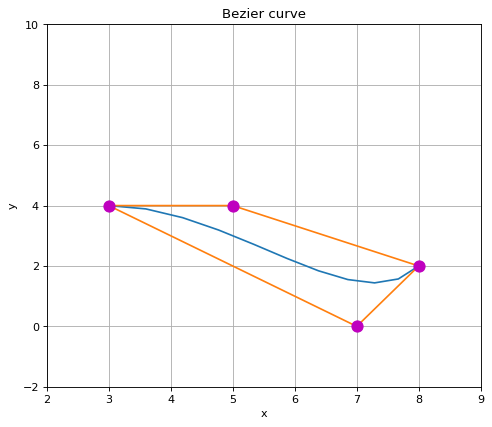

In [ ]:
#рисуем
plt.figure(figsize=(7, 6), dpi=80)
plt.plot(xdata, ydata, color ='tab:blue')
plt.plot(points[[0,2,3],0],points[[0,2,3],1], color ='tab:orange')
plt.plot(points[[0,1,3],0],points[[0,1,3],1], color ='tab:orange')
plt.plot(3,4, 'mo',markersize=10)
plt.plot(5,4, 'mo',markersize=10)
plt.plot(7,0, 'mo',markersize=10)
plt.plot(8,2, 'mo',markersize=10)
plt.xlim([2, 9])
plt.ylim([-2,10])
plt.title('Bezier curve')
plt.grid(axis = 'both')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Задание 5

Дана f на [1,3]

По указанной норме наименее уклоняющийся от нуля многочлен 3й степени на [-1,1] это многочлен Чебышева 2го вида $\bar{U}_3$

Сдвигаем его на [1,3] и получаем $\tilde{V}_3$

$f = x^3+2x^2+4x+4$

$\bar{U}_3(x)=8x^3-4x$

$\tilde{V}_3 = 8(x-2)^3-4(x-2)=8x^3-48x^2+92x-56$


Необходимо минимизировать g(x), где a,b,c искомые коэффициенты трехчлена

Для этого приравняем коэффициенты g(x) и $\tilde{V}_3$

$g(x)=x^3+2x^2+4x+4-ax^2-bx-c=x^3+(2-a)x^2+(4-b)x+4-c$

\begin{equation}
    \begin{cases}
      8(2-a)=-48\\
      8(4-b)=92\\
      8(4-c)=-56
    \end{cases}\
\end{equation}

In [ ]:
a, b, c = symbols('a b c')

In [ ]:
#решаем систему
solve((8*(2-a)+48,8*(4-b)-92,8*(4-c)+56))

{a: 8, b: -15/2, c: 11}

$8x^2-7.5x+11$

#Задание 6

Находим, насколько вектор b отклоняется от истинного b в случае решения (1,1)

Находим число обусловленности

Оцениваем относительную погрешность x через относительную погрешность b и число обусловленности

In [ ]:
#матрица A
A = Matrix([
            [-2.99,0.1],
            [1.94,-3.95]
])

In [ ]:
#истинный b
b = Matrix([-3.1,-2.1])

In [ ]:
#приближенный x
x_bar = Matrix([1,1])

In [ ]:
#приближенный b при решении (1,1)
b_delta = b - A*x_bar

In [ ]:
#норма 1 b 
norm1_b = abs(b[0]) + abs(b[1])

In [ ]:
#норма 2 b
norm2_b = sqrt(b[0]**2 + b[1]**2)

In [ ]:
#норма 1 delta b
norm1_b_delta = abs(b_delta[0]) + abs(b_delta[1])

In [ ]:
#норма 2 delta b
norm2_b_delta = sqrt(b_delta[0]**2 + b_delta[1]**2)

In [ ]:
#относительная погрешность b по норме 1
err_b_norm1 = norm1_b_delta / norm1_b

In [ ]:
#относительная погрешность b по норме 2
err_b_norm2 = norm2_b_delta / norm2_b

In [ ]:
print(err_b_norm1,'\n',err_b_norm2)

0.0576923076923077 
 0.0610184602922236


Находим cond(A) по норме 2

Для этого найдем сингулярные значения B = А'A

In [ ]:
B = A.T * A

In [ ]:
B

Matrix([
[12.7037,  -7.962],
[ -7.962, 15.6125]])

In [ ]:
v = symbols('lambda')

In [ ]:
#решаем det(B-λI)=0
eq = Eq((B[0,0]-v) * (B[1,1]-v) - B[1,0] * B[0,1],0)

In [ ]:
sol = solve((eq),v)

Сингулярные значения А'A

In [ ]:
sol

[6.06435405884272, 22.2518459411573]

In [ ]:
cond_A_norm2 = sqrt(max(sol)/min(sol))

Cond(A) по норме 2

In [ ]:
cond_A_norm2

1.91553789361316

Находим cond(A) по норме 1

In [ ]:
A_inverse = Inverse(A)

In [ ]:
norm1_A = max(abs(A[0,0]) + abs(A[1,0]),abs(A[0,1]) + abs(A[1,1]))

In [ ]:
norm1_A_inverse = max(abs(A_inverse[0,0]) + abs(A_inverse[1,0]),abs(A_inverse[0,1]) + abs(A_inverse[1,1]))

In [ ]:
cond_A_norm1 = norm1_A * norm1_A_inverse

Cond(A) по норме 1

In [ ]:
cond_A_norm1

2.49969440020660

In [ ]:
err_x_norm1 = [1 / cond_A_norm1 * err_b_norm1,cond_A_norm1 * err_b_norm1]

In [ ]:
err_x_norm2 = [1 / cond_A_norm2 * err_b_norm2,cond_A_norm2 * err_b_norm2]

Относительная погрешность (1,1) по норме 1

In [ ]:
err_x_norm1

[0.0230797443429642, 0.144213138473458]

Относительная погрешность (1,1) по норме 2

In [ ]:
err_x_norm2

[0.0318544783142495, 0.116883172899684]

#Задание 7

$f(x)=\sqrt{3x+6}\qquad [2,6]$

Воспользуемся формулой приближения $f(x)$
\begin{equation}
\tilde{f}(x) = \sum_{i=0}^{n}\frac{\langle T_i,f \rangle} {\langle T_i,T_i\rangle}T_i(x)
\end{equation}

Скалярное произведение находим по норме

In [ ]:
#функция многочлена Чебышева 1го вида n степени на [1,1]
def cheb(x, n):
  if n==0:
    return 1
  elif n == 1:
    return x
  else:
     return 2*x*cheb(x,n-1)-cheb(x,n-2)

In [ ]:
a = 2
b = 6

In [ ]:
#функция многочлена Чебышева 1го вида n степени на [a,b]
def cheb_mod(x,n):
  return cheb((2*x-(b+a))/(b-a),n)

In [ ]:
#функция веса
def weight(x):
  return 1/(sqrt(1-(2*x-8)**2/16))

In [ ]:
#функция для приближения
def f(x,n):
  return sqrt(3*x+6)

In [ ]:
#функция скалярного произведения исходя из нормы
def inner_product(p,q,n):
  u = np.linspace(2,6,1000)[1:][:-1]
  t = []
  for i in u:
    t.append(p(i,n)*q(i,n)*weight(i))
  return np.trapz(t,u)

In [ ]:
q = symbols('q')

In [ ]:
polynom = 0
for i in range(4):
  polynom += inner_product(cheb_mod,f,i)/inner_product(cheb_mod,cheb_mod,i)*cheb_mod(q,i)

Аппроксимирующий многочлен

In [ ]:
simplify(polynom)

-0.0290884780384603*q**3 + 0.153790106244348*q**2 + 0.610473363523592*q + 1.56330540339041

In [ ]:
#устанавливаем пары x-y для двух функции и ее приближения
ydata = []
y1data = []
u = np.linspace(2,6,1000)
for i in u:
  ydata.append(f(i,1))
  y1data.append(polynom.subs({q:i}))

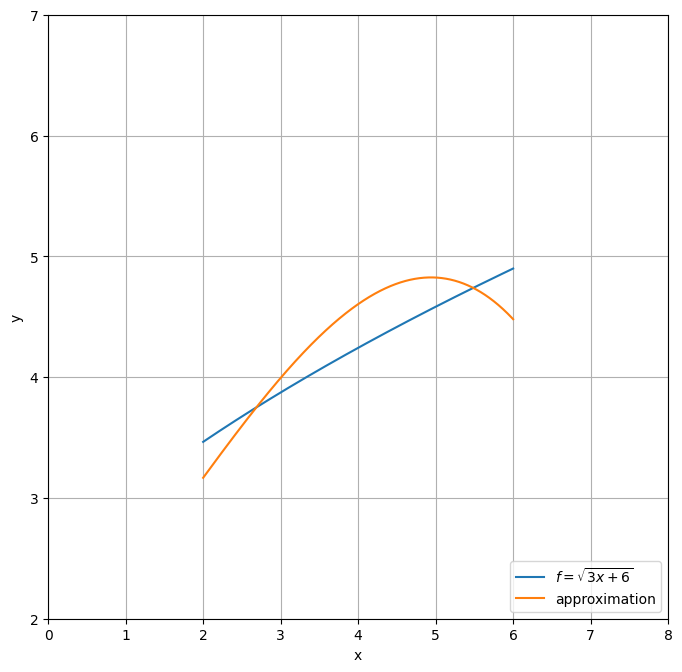

In [ ]:
#рисуем
plt.figure(figsize=(8,8), dpi=100)
plt.plot(u, ydata, color ='tab:blue')
plt.plot(u, y1data, color ='tab:orange')
plt.legend(['$f=\sqrt{3x+6}$','approximation'], loc ="lower right")
plt.xlim([0, 8])
plt.ylim([2, 7])
plt.grid(axis = 'both')
plt.xlabel('x')
plt.ylabel('y')
plt.show()